## Healthcare Project ##

## MIMIC-III Clinical Database 1.4 ##

## ADMISSIONS TABLE ##

**Table Description:**

- row_id: Unique row identifier.
- subject_id: Foreign key. Identifies the patient.
- hadm_id: Primary key. Identifies the hospital stay.
- admittime: Time of admission to the hospital.
- dischtime: Time of discharge from the hospital.
- deathtime: Time of death. Nullable.
- admission_type: Type of admission, for example, emergency or elective.
- admission_location: Admission location.
- discharge_location: Discharge location.
- insurance: Insurance type.
- language: Language. Nullable.
- religion: Religion. Nullable.
- marital_status: Marital status. Nullable.
- ethnicity: Ethnicity.
- edregtime: Time of registration in the emergency department. Nullable.
- edouttime: Time of leaving the emergency department. Nullable.
- diagnosis: Diagnosis. Nullable.
- hospital_expire_flag: Hospital admission has at least one observation in the CHARTEVENTS table. Nullable.
- has_chartevents_data: Hospital admission has at least one observation in the CHARTEVENTS table.

**Websites:**

https://physionet.org/content/mimiciii/1.4/

https://mimic.mit.edu/docs/iii/tables/

https://mit-lcp.github.io/mimic-schema-spy/tables/prescriptions.html

https://www.hipaaguide.net/what-is-considered-as-phi-under-hipaa/

Libraries

In [74]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [75]:
# load admission dataset
admissions = pd.read_csv('ADMISSIONS.csv')

#https://mit-lcp.github.io/mimic-schema-spy/index.html

In [76]:
admissions

ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0          21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1          22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2          23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   
3          24          24   161859  2139-06-06 16:14:00  2139-06-09 12:48:00   
4          25          25   129635  2160-11-02 02:06:00  2160-11-05 14:55:00   
...       ...         ...      ...                  ...                  ...   
58971   58594       98800   191113  2131-03-30 21:13:00  2131-04-02 15:02:00   
58972   58595       98802   101071  2151-03-05 20:00:00  2151-03-06 09:10:00   
58973   58596       98805   122631  2200-09-12 07:15:00  2200-09-20 12:08:00   
58974   58597       98813   170407  2128-11-11 02:29:00  2128-12-22 13:11:00   
58975   58598       98813   190264  2131-10-25 03:09:00  2131-10-26 17:44:00   

                 DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0                      NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1                      NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2                      NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                      NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4                      NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
...                    ...            ...                        ...   
58971                  NaN      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972  2151-03-06 09:10:00      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973                  NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
58975                  NaN      EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0      DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1               HOME HEALTH CARE  Medicare      NaN           CATHOLIC   
2               HOME HEALTH CARE  Medicare     ENGL           CATHOLIC   
3                           HOME   Private      NaN  PROTESTANT QUAKER   
4                           HOME   Private      NaN       UNOBTAINABLE   
...                          ...       ...      ...                ...   
58971                       HOME   Private     ENGL      NOT SPECIFIED   
58972               DEAD/EXPIRED  Medicare     ENGL           CATHOLIC   
58973           HOME HEALTH CARE   Private     ENGL      NOT SPECIFIED   
58974                        SNF   Private     ENGL           CATHOLIC   
58975                       HOME   Private     ENGL           CATHOLIC   

      MARITAL_STATUS ETHNICITY            EDREGTIME            EDOUTTIME  \
0            MARRIED     WHITE  2196-04-09 10:06:00  2196-04-09 13:24:00   
1            MARRIED     WHITE                  NaN                  NaN   
2            MARRIED     WHITE                  NaN                  NaN   
3             SINGLE     WHITE                  NaN                  NaN   
4            MARRIED     WHITE  2160-11-02 01:01:00  2160-11-02 04:27:00   
...              ...       ...                  ...                  ...   
58971         SINGLE     WHITE  2131-03-30 19:44:00  2131-03-30 22:41:00   
58972        WIDOWED     WHITE  2151-03-05 17:23:00  2151-03-05 21:06:00   
58973        MARRIED     WHITE                  NaN                  NaN   
58974        MARRIED     WHITE  2128-11-10 23:48:00  2128-11-11 03:16:00   
58975        MARRIED     WHITE  2131-10-25 00:08:00  2131-10-25 04:35:00   

                                               DIAGNOSIS  \
0                                BENZODIAZEPINE OVERDOSE   
1      CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...   
2                                             BRAIN MASS   
3                         INTERIOR MYOCARDIAL INFARCTION   
4                                ACUTE CORONARY SYNDROME   
...                

In [77]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [78]:
# to check how many null values in the dataset
admissions.isnull().sum()

    # DEATHTIME
    # LANGUAGE
    # RELIGION
    # MARITAL_STATUS
    # EDREGTIME
    # EDOUTTIME
    # DIAGNOSIS

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
ADMITTIME                   0
DISCHTIME                   0
DEATHTIME               53122
ADMISSION_TYPE              0
ADMISSION_LOCATION          0
DISCHARGE_LOCATION          0
INSURANCE                   0
LANGUAGE                25332
RELIGION                  458
MARITAL_STATUS          10128
ETHNICITY                   0
EDREGTIME               28099
EDOUTTIME               28099
DIAGNOSIS                  25
HOSPITAL_EXPIRE_FLAG        0
HAS_CHARTEVENTS_DATA        0
dtype: int64

In [79]:
# to check null values percentage
(admissions.isnull().sum()/(len(admissions)))*100

ROW_ID                   0.000000
SUBJECT_ID               0.000000
HADM_ID                  0.000000
ADMITTIME                0.000000
DISCHTIME                0.000000
DEATHTIME               90.073928
ADMISSION_TYPE           0.000000
ADMISSION_LOCATION       0.000000
DISCHARGE_LOCATION       0.000000
INSURANCE                0.000000
LANGUAGE                42.953066
RELIGION                 0.776587
MARITAL_STATUS          17.173087
ETHNICITY                0.000000
EDREGTIME               47.644805
EDOUTTIME               47.644805
DIAGNOSIS                0.042390
HOSPITAL_EXPIRE_FLAG     0.000000
HAS_CHARTEVENTS_DATA     0.000000
dtype: float64

In [80]:
# to check number of unique values in each columns
admissions.nunique()

ROW_ID                  58976
SUBJECT_ID              46520
HADM_ID                 58976
ADMITTIME               58651
DISCHTIME               58657
DEATHTIME                5834
ADMISSION_TYPE              4
ADMISSION_LOCATION          9
DISCHARGE_LOCATION         17
INSURANCE                   5
LANGUAGE                   75
RELIGION                   20
MARITAL_STATUS              7
ETHNICITY                  41
EDREGTIME               30874
EDOUTTIME               30864
DIAGNOSIS               15691
HOSPITAL_EXPIRE_FLAG        2
HAS_CHARTEVENTS_DATA        2
dtype: int64

Update date/time columns into 'datetime' format/type

In [81]:
# to update column data type to datetime
to_datetime = ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME']

for col in to_datetime:
    admissions[col] = pd.to_datetime(admissions[col])

# to update data type to string
to_string = ['ROW_ID', 'SUBJECT_ID', 'HADM_ID']

for col in to_string:
    admissions[col] = admissions[col].astype('str')

admissions.info()

# datetime data:
    # due to data deidentification:
    # https://www.nature.com/articles/sdata201635

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ROW_ID                58976 non-null  object        
 1   SUBJECT_ID            58976 non-null  object        
 2   HADM_ID               58976 non-null  object        
 3   ADMITTIME             58976 non-null  datetime64[ns]
 4   DISCHTIME             58976 non-null  datetime64[ns]
 5   DEATHTIME             5854 non-null   datetime64[ns]
 6   ADMISSION_TYPE        58976 non-null  object        
 7   ADMISSION_LOCATION    58976 non-null  object        
 8   DISCHARGE_LOCATION    58976 non-null  object        
 9   INSURANCE             58976 non-null  object        
 10  LANGUAGE              33644 non-null  object        
 11  RELIGION              58518 non-null  object        
 12  MARITAL_STATUS        48848 non-null  object        
 13  ETHNICITY       

Check values of unique columns and collapse the categories as necessary

In [82]:
# to check the unique values of each columns:
    # ADMISSTION_TYPE
print(admissions['ADMISSION_TYPE'].unique())
print(admissions['ADMISSION_TYPE'].nunique())

# to collapse the urgent and emergency into 1 category
admissions['ADMISSION_TYPE'] = admissions['ADMISSION_TYPE'].replace({'URGENT':"URGENT/EMERGENCY", "EMERGENCY": "URGENT/EMERGENCY"})

# ADMISSION_TYPE

# ADMISSION_TYPE describes the type of the admission: ‘ELECTIVE’, ‘URGENT’, ‘NEWBORN’ or ‘EMERGENCY’. 
# Emergency/urgent indicate unplanned medical care, and are often collapsed into a single category in studies.
# Elective indicates a previously planned hospital admission. Newborn indicates that the HADM_ID pertains to the patient’s birth.

['EMERGENCY' 'ELECTIVE' 'NEWBORN' 'URGENT']
4


In [83]:
# to collapse the urgent and emergency into 1 category
admissions['ADMISSION_TYPE'] = admissions['ADMISSION_TYPE'].replace({'URGENT':"URGENT/EMERGENCY", "EMERGENCY": "URGENT/EMERGENCY"})

# to check the unique values of each columns after update:
    # ADMISSTION_TYPE
print(admissions['ADMISSION_TYPE'].unique())
print(admissions['ADMISSION_TYPE'].nunique())


['URGENT/EMERGENCY' 'ELECTIVE' 'NEWBORN']
3


In [84]:
# to check the unique values of each columns:
    # ADMISSION_LOCATION
print(admissions['ADMISSION_LOCATION'].unique())
print(admissions['ADMISSION_LOCATION'].nunique())

['EMERGENCY ROOM ADMIT' 'PHYS REFERRAL/NORMAL DELI'
 'TRANSFER FROM HOSP/EXTRAM' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM SKILLED NUR' 'HMO REFERRAL/SICK'
 'TRANSFER FROM OTHER HEALT' '** INFO NOT AVAILABLE **'
 'TRSF WITHIN THIS FACILITY']
9


In [85]:
# to remove the "**" from the column:
admissions['ADMISSION_LOCATION'] = admissions['ADMISSION_LOCATION'].str.replace("** ", "")
admissions['ADMISSION_LOCATION'] = admissions['ADMISSION_LOCATION'].str.replace(" **", "")

# to check the unique values of each columns after update:
    # ADMISSION_LOCATION
print(admissions['ADMISSION_LOCATION'].unique())
print(admissions['ADMISSION_LOCATION'].nunique())

['EMERGENCY ROOM ADMIT' 'PHYS REFERRAL/NORMAL DELI'
 'TRANSFER FROM HOSP/EXTRAM' 'CLINIC REFERRAL/PREMATURE'
 'TRANSFER FROM SKILLED NUR' 'HMO REFERRAL/SICK'
 'TRANSFER FROM OTHER HEALT' 'INFO NOT AVAILABLE'
 'TRSF WITHIN THIS FACILITY']
9


In [86]:
# to check the unique values of each columns:
    # DISCHARGE_LOCATION
print(admissions['DISCHARGE_LOCATION'].unique())
print(admissions['DISCHARGE_LOCATION'].nunique())

['DISC-TRAN CANCER/CHLDRN H' 'HOME HEALTH CARE' 'HOME' 'DEAD/EXPIRED'
 'REHAB/DISTINCT PART HOSP' 'LONG TERM CARE HOSPITAL'
 'DISC-TRAN TO FEDERAL HC' 'SNF' 'SHORT TERM HOSPITAL'
 'HOSPICE-MEDICAL FACILITY' 'HOME WITH HOME IV PROVIDR' 'HOSPICE-HOME'
 'LEFT AGAINST MEDICAL ADVI' 'DISCH-TRAN TO PSYCH HOSP' 'OTHER FACILITY'
 'ICF' 'SNF-MEDICAID ONLY CERTIF']
17


In [87]:
# to check the unique values of each columns:
    # INSURANCE
print(admissions['INSURANCE'].unique())
print(admissions['INSURANCE'].nunique())

['Private' 'Medicare' 'Medicaid' 'Self Pay' 'Government']
5


In [88]:
# to check the unique values of each columns:
    # LANGUAGE
print(admissions['LANGUAGE'].unique())
print(admissions['LANGUAGE'].nunique())

[nan 'ENGL' 'VIET' 'PORT' 'MAND' 'CANT' 'SPAN' 'RUSS' 'CAPE' '*MAN' 'PTUN'
 'HIND' 'ITAL' 'HAIT' 'GREE' 'CAMB' '*ARM' '*CHI' 'ALBA' '*DEA' 'POLI'
 'FREN' 'ARAB' 'AMER' 'LAOT' '*PUN' '*URD' '*BUR' '*BEN' '*TOY' '*HUN'
 'KORE' 'THAI' 'PERS' 'ETHI' 'JAPA' '*PHI' '*IBO' '*LEB' '*FUL' 'URDU'
 '*SPA' '*RUS' 'SOMA' '* BE' '*CAN' '*CDI' 'TURK' '*TOI' 'GERM' '*GUJ'
 '*BOS' '*BUL' '*TEL' '*YID' '*ROM' '**TO' 'BENG' '*AMH' 'TAGA' '* FU'
 '*MOR' '*ARA' '*YOR' '*FAR' '*DUT' 'SERB' '*KHM' '** T' '*NEP' '*CRE'
 '*FIL' '*LIT' '*PER' '**SH' '*TAM']
75


In [89]:
# to replace 'nan' with 'NOT SPECIFIED"
admissions['LANGUAGE'] = admissions['LANGUAGE'].fillna('NOT SPECIFIED')

# to check the unique values of each columns after update:
    # LANGUAGE
print(admissions['LANGUAGE'].unique())
print(admissions['LANGUAGE'].nunique())

['NOT SPECIFIED' 'ENGL' 'VIET' 'PORT' 'MAND' 'CANT' 'SPAN' 'RUSS' 'CAPE'
 '*MAN' 'PTUN' 'HIND' 'ITAL' 'HAIT' 'GREE' 'CAMB' '*ARM' '*CHI' 'ALBA'
 '*DEA' 'POLI' 'FREN' 'ARAB' 'AMER' 'LAOT' '*PUN' '*URD' '*BUR' '*BEN'
 '*TOY' '*HUN' 'KORE' 'THAI' 'PERS' 'ETHI' 'JAPA' '*PHI' '*IBO' '*LEB'
 '*FUL' 'URDU' '*SPA' '*RUS' 'SOMA' '* BE' '*CAN' '*CDI' 'TURK' '*TOI'
 'GERM' '*GUJ' '*BOS' '*BUL' '*TEL' '*YID' '*ROM' '**TO' 'BENG' '*AMH'
 'TAGA' '* FU' '*MOR' '*ARA' '*YOR' '*FAR' '*DUT' 'SERB' '*KHM' '** T'
 '*NEP' '*CRE' '*FIL' '*LIT' '*PER' '**SH' '*TAM']
76


In [90]:
# to check the unique values of each columns:
    # RELIGION
print(admissions['RELIGION'].unique())
print(admissions['RELIGION'].nunique())

['UNOBTAINABLE' 'CATHOLIC' 'PROTESTANT QUAKER' 'NOT SPECIFIED' 'JEWISH'
 'BUDDHIST' 'OTHER' "JEHOVAH'S WITNESS" nan 'GREEK ORTHODOX'
 'EPISCOPALIAN' 'HINDU' 'CHRISTIAN SCIENTIST' 'HEBREW' 'METHODIST'
 'UNITARIAN-UNIVERSALIST' 'BAPTIST' '7TH DAY ADVENTIST' 'MUSLIM'
 'ROMANIAN EAST. ORTH' 'LUTHERAN']
20


In [91]:
# to replace "UNOBTAINABLE" to "NOT SPECIFIED" and 'nan' to "NOT SPECIFIED"
admissions['RELIGION'] = admissions['RELIGION'].replace({'UNOBTAINABLE': 'NOT SPECIFIED'})
admissions['RELIGION'] = admissions['RELIGION'].fillna('NOT SPECIFIED')

# to check the unique values of each columns after update:
    # RELIGION
print(admissions['RELIGION'].unique())
print(admissions['RELIGION'].nunique())

['NOT SPECIFIED' 'CATHOLIC' 'PROTESTANT QUAKER' 'JEWISH' 'BUDDHIST'
 'OTHER' "JEHOVAH'S WITNESS" 'GREEK ORTHODOX' 'EPISCOPALIAN' 'HINDU'
 'CHRISTIAN SCIENTIST' 'HEBREW' 'METHODIST' 'UNITARIAN-UNIVERSALIST'
 'BAPTIST' '7TH DAY ADVENTIST' 'MUSLIM' 'ROMANIAN EAST. ORTH' 'LUTHERAN']
19


In [92]:
# to check the unique values of each columns:
    # MARITAL_STATUS
print(admissions['MARITAL_STATUS'].unique())
print(admissions['MARITAL_STATUS'].nunique())

['MARRIED' 'SINGLE' nan 'DIVORCED' 'WIDOWED' 'SEPARATED'
 'UNKNOWN (DEFAULT)' 'LIFE PARTNER']
7


In [93]:
# to replace 'UNKNOWN (DEFAULT)' and 'nan' to "NOT SPECIFIED" 
admissions['MARITAL_STATUS'] = admissions['MARITAL_STATUS'].replace({'UNKNOWN (DEFAULT)': 'NOT SPECIFIED'})
admissions['MARITAL_STATUS'] = admissions['MARITAL_STATUS'].fillna("NOT SPECIFIED")

# to check the unique values of each columns after update:
    # MARITAL_STATUS
print(admissions['MARITAL_STATUS'].unique())
print(admissions['MARITAL_STATUS'].nunique())

['MARRIED' 'SINGLE' 'NOT SPECIFIED' 'DIVORCED' 'WIDOWED' 'SEPARATED'
 'LIFE PARTNER']
7


In [94]:
# to check the unique values of each columns:
    # ETHNICITY
print(sorted(admissions['ETHNICITY'].unique()))
print(admissions['ETHNICITY'].nunique())

['AMERICAN INDIAN/ALASKA NATIVE', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - CAMBODIAN', 'ASIAN - CHINESE', 'ASIAN - FILIPINO', 'ASIAN - JAPANESE', 'ASIAN - KOREAN', 'ASIAN - OTHER', 'ASIAN - THAI', 'ASIAN - VIETNAMESE', 'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN', 'CARIBBEAN ISLAND', 'HISPANIC OR LATINO', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'HISPANIC/LATINO - COLOMBIAN', 'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - GUATEMALAN', 'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - MEXICAN', 'HISPANIC/LATINO - PUERTO RICAN', 'HISPANIC/LATINO - SALVADORAN', 'MIDDLE EASTERN', 'MULTI RACE ETHNICITY', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'OTHER', 'PATIENT DECLINED TO ANSWER', 'PORTUGUESE', 'SOUTH AMERICAN', 'UNABLE TO OBTAIN', 'UNKNOWN/NOT SPECIFIED', 'WHITE', 'WHITE - BRAZILIAN', 'WHITE - EASTERN EUROPEAN', 'WHITE - OTHER EUROPEAN', 'WHITE - RUSSIAN'

In [95]:
# to update some of the values in the ETHNICITY column
to_update = {"ASIAN - ASIAN INDIAN": "ASIAN - INDIAN", 
             "ASIAN": "ASIAN - OTHER",
             "BLACK/AFRICAN": "BLACK/AFRICAN AMERICAN",
             "PATIENT DECLINED TO ANSWER": "NOT SPECIFIED",
             "UNABLE TO OBTAIN": "NOT SPECIFIED",
             "UNKNOWN/NOT SPECIFIED": "NOT SPECIFIED"}

admissions['ETHNICITY'] = admissions['ETHNICITY'].replace(to_update)    

# to check the unique values of each columns after update:
    # ETHNICITY
print(admissions['ETHNICITY'].unique())
print(admissions['ETHNICITY'].nunique())

['WHITE' 'NOT SPECIFIED' 'MULTI RACE ETHNICITY' 'BLACK/AFRICAN AMERICAN'
 'HISPANIC OR LATINO' 'ASIAN - OTHER' 'OTHER'
 'HISPANIC/LATINO - GUATEMALAN' 'ASIAN - VIETNAMESE'
 'AMERICAN INDIAN/ALASKA NATIVE' 'WHITE - RUSSIAN'
 'HISPANIC/LATINO - PUERTO RICAN' 'ASIAN - CHINESE' 'ASIAN - INDIAN'
 'HISPANIC/LATINO - SALVADORAN' 'HISPANIC/LATINO - DOMINICAN'
 'BLACK/CAPE VERDEAN' 'BLACK/HAITIAN' 'WHITE - OTHER EUROPEAN'
 'PORTUGUESE' 'SOUTH AMERICAN' 'WHITE - EASTERN EUROPEAN'
 'CARIBBEAN ISLAND' 'ASIAN - FILIPINO' 'ASIAN - CAMBODIAN'
 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)' 'WHITE - BRAZILIAN'
 'ASIAN - KOREAN' 'HISPANIC/LATINO - COLOMBIAN' 'ASIAN - JAPANESE'
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' 'ASIAN - THAI'
 'HISPANIC/LATINO - HONDURAN' 'HISPANIC/LATINO - CUBAN' 'MIDDLE EASTERN'
 'HISPANIC/LATINO - MEXICAN'
 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE']
37


In [96]:
# to check the unique values of each columns:
    # HOSPITAL_EXPIRE_FLAG
print(sorted(admissions['HOSPITAL_EXPIRE_FLAG'].unique()))
print(admissions['HOSPITAL_EXPIRE_FLAG'].nunique())

[0, 1]
2


In [97]:
# to check the unique values of each columns:
    # AS_CHARTEVENTS_DATA
print(sorted(admissions['HAS_CHARTEVENTS_DATA'].unique()))
print(admissions['HAS_CHARTEVENTS_DATA'].nunique())

[0, 1]
2


In [98]:
admissions.nunique()

ROW_ID                  58976
SUBJECT_ID              46520
HADM_ID                 58976
ADMITTIME               58651
DISCHTIME               58657
DEATHTIME                5834
ADMISSION_TYPE              3
ADMISSION_LOCATION          9
DISCHARGE_LOCATION         17
INSURANCE                   5
LANGUAGE                   76
RELIGION                   19
MARITAL_STATUS              7
ETHNICITY                  37
EDREGTIME               30874
EDOUTTIME               30864
DIAGNOSIS               15691
HOSPITAL_EXPIRE_FLAG        2
HAS_CHARTEVENTS_DATA        2
dtype: int64

Creation of new columns

In [99]:
# created 'readmitted' column to identify which subject_id have been readmitted | used [0, 1] 
admissions['Readmitted'] = admissions.duplicated(subset='SUBJECT_ID', keep=False).astype(int)
admissions

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
0         21         22  165315 2196-04-09 12:26:00 2196-04-10 15:54:00   
1         22         23  152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
2         23         23  124321 2157-10-18 19:34:00 2157-10-25 14:00:00   
3         24         24  161859 2139-06-06 16:14:00 2139-06-09 12:48:00   
4         25         25  129635 2160-11-02 02:06:00 2160-11-05 14:55:00   
...      ...        ...     ...                 ...                 ...   
58971  58594      98800  191113 2131-03-30 21:13:00 2131-04-02 15:02:00   
58972  58595      98802  101071 2151-03-05 20:00:00 2151-03-06 09:10:00   
58973  58596      98805  122631 2200-09-12 07:15:00 2200-09-20 12:08:00   
58974  58597      98813  170407 2128-11-11 02:29:00 2128-12-22 13:11:00   
58975  58598      98813  190264 2131-10-25 03:09:00 2131-10-26 17:44:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
0                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
1                     NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
...                   ...               ...                        ...   
58971                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972 2151-03-06 09:10:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973                 NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
58975                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE       LANGUAGE           RELIGION  \
0      DISC-TRAN CANCER/CHLDRN H   Private  NOT SPECIFIED      NOT SPECIFIED   
1               HOME HEALTH CARE  Medicare  NOT SPECIFIED           CATHOLIC   
2               HOME HEALTH CARE  Medicare           ENGL           CATHOLIC   
3                           HOME   Private  NOT SPECIFIED  PROTESTANT QUAKER   
4                           HOME   Private  NOT SPECIFIED      NOT SPECIFIED   
...                          ...       ...            ...                ...   
58971                       HOME   Private           ENGL      NOT SPECIFIED   
58972               DEAD/EXPIRED  Medicare           ENGL           CATHOLIC   
58973           HOME HEALTH CARE   Private           ENGL      NOT SPECIFIED   
58974                        SNF   Private           ENGL           CATHOLIC   
58975                       HOME   Private           ENGL           CATHOLIC   

      MARITAL_STATUS ETHNICITY           EDREGTIME           EDOUTTIME  \
0            MARRIED     WHITE 2196-04-09 10:06:00 2196-04-09 13:24:00   
1            MARRIED     WHITE                 NaT                 NaT   
2            MARRIED     WHITE                 NaT                 NaT   
3             SINGLE     WHITE                 NaT                 NaT   
4            MARRIED     WHITE 2160-11-02 01:01:00 2160-11-02 04:27:00   
...              ...       ...                 ...                 ...   
58971         SINGLE     WHITE 2131-03-30 19:44:00 2131-03-30 22:41:00   
58972        WIDOWED     WHITE 2151-03-05 17:23:00 2151-03-05 21:06:00   
58973        MARRIED     WHITE                 NaT                 NaT   
58974        MARRIED     WHITE 2128-11-10 23:48:00 2128-11-11 03:16:00   
58975        MARRIED     WHITE 2131-10-25 00:08:00 2131-10-25 04:35:00   

                                               DIAGNOSIS  \
0                                BENZODIAZEPINE OVERDOSE   
1      CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...   
2                                             BRAIN MASS   
3                         INTERIOR MYOCARDIAL INFARCTION   
4                                ACUTE CORONARY SYNDROME   
...   

In [100]:
# create column for the admit time and discharge time difference
# converted difference to number of 'days'
admissions['adm_disch_diff'] = (admissions['DISCHTIME'] - admissions['ADMITTIME']).dt.total_seconds()/(3600 * 24)
admissions

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
0         21         22  165315 2196-04-09 12:26:00 2196-04-10 15:54:00   
1         22         23  152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
2         23         23  124321 2157-10-18 19:34:00 2157-10-25 14:00:00   
3         24         24  161859 2139-06-06 16:14:00 2139-06-09 12:48:00   
4         25         25  129635 2160-11-02 02:06:00 2160-11-05 14:55:00   
...      ...        ...     ...                 ...                 ...   
58971  58594      98800  191113 2131-03-30 21:13:00 2131-04-02 15:02:00   
58972  58595      98802  101071 2151-03-05 20:00:00 2151-03-06 09:10:00   
58973  58596      98805  122631 2200-09-12 07:15:00 2200-09-20 12:08:00   
58974  58597      98813  170407 2128-11-11 02:29:00 2128-12-22 13:11:00   
58975  58598      98813  190264 2131-10-25 03:09:00 2131-10-26 17:44:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
0                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
1                     NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
...                   ...               ...                        ...   
58971                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972 2151-03-06 09:10:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973                 NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
58975                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE  ...           RELIGION  \
0      DISC-TRAN CANCER/CHLDRN H   Private  ...      NOT SPECIFIED   
1               HOME HEALTH CARE  Medicare  ...           CATHOLIC   
2               HOME HEALTH CARE  Medicare  ...           CATHOLIC   
3                           HOME   Private  ...  PROTESTANT QUAKER   
4                           HOME   Private  ...      NOT SPECIFIED   
...                          ...       ...  ...                ...   
58971                       HOME   Private  ...      NOT SPECIFIED   
58972               DEAD/EXPIRED  Medicare  ...           CATHOLIC   
58973           HOME HEALTH CARE   Private  ...      NOT SPECIFIED   
58974                        SNF   Private  ...           CATHOLIC   
58975                       HOME   Private  ...           CATHOLIC   

      MARITAL_STATUS ETHNICITY           EDREGTIME           EDOUTTIME  \
0            MARRIED     WHITE 2196-04-09 10:06:00 2196-04-09 13:24:00   
1            MARRIED     WHITE                 NaT                 NaT   
2            MARRIED     WHITE                 NaT                 NaT   
3             SINGLE     WHITE                 NaT                 NaT   
4            MARRIED     WHITE 2160-11-02 01:01:00 2160-11-02 04:27:00   
...              ...       ...                 ...                 ...   
58971         SINGLE     WHITE 2131-03-30 19:44:00 2131-03-30 22:41:00   
58972        WIDOWED     WHITE 2151-03-05 17:23:00 2151-03-05 21:06:00   
58973        MARRIED     WHITE                 NaT                 NaT   
58974        MARRIED     WHITE 2128-11-10 23:48:00 2128-11-11 03:16:00   
58975        MARRIED     WHITE 2131-10-25 00:08:00 2131-10-25 04:35:00   

                                               DIAGNOSIS HOSPITAL_EXPIRE_FLAG  \
0                                BENZODIAZEPINE OVERDOSE                    0   
1      CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                    0   
2                                             BRAIN MASS                    0   
3                         INTERIOR MYOCARDIAL INFARCTION                    0   
4                                ACUTE CORONARY SYNDROME                    0   


In [101]:
# create column for discharge time and death time of the patients that died
# converted difference to number of 'days'
admissions['disch_death_diff'] = (admissions['DEATHTIME'] - admissions['DISCHTIME']).dt.total_seconds()/(3600*24)
admissions

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
0         21         22  165315 2196-04-09 12:26:00 2196-04-10 15:54:00   
1         22         23  152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
2         23         23  124321 2157-10-18 19:34:00 2157-10-25 14:00:00   
3         24         24  161859 2139-06-06 16:14:00 2139-06-09 12:48:00   
4         25         25  129635 2160-11-02 02:06:00 2160-11-05 14:55:00   
...      ...        ...     ...                 ...                 ...   
58971  58594      98800  191113 2131-03-30 21:13:00 2131-04-02 15:02:00   
58972  58595      98802  101071 2151-03-05 20:00:00 2151-03-06 09:10:00   
58973  58596      98805  122631 2200-09-12 07:15:00 2200-09-20 12:08:00   
58974  58597      98813  170407 2128-11-11 02:29:00 2128-12-22 13:11:00   
58975  58598      98813  190264 2131-10-25 03:09:00 2131-10-26 17:44:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
0                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
1                     NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
...                   ...               ...                        ...   
58971                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972 2151-03-06 09:10:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973                 NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
58975                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE  ... MARITAL_STATUS ETHNICITY  \
0      DISC-TRAN CANCER/CHLDRN H   Private  ...        MARRIED     WHITE   
1               HOME HEALTH CARE  Medicare  ...        MARRIED     WHITE   
2               HOME HEALTH CARE  Medicare  ...        MARRIED     WHITE   
3                           HOME   Private  ...         SINGLE     WHITE   
4                           HOME   Private  ...        MARRIED     WHITE   
...                          ...       ...  ...            ...       ...   
58971                       HOME   Private  ...         SINGLE     WHITE   
58972               DEAD/EXPIRED  Medicare  ...        WIDOWED     WHITE   
58973           HOME HEALTH CARE   Private  ...        MARRIED     WHITE   
58974                        SNF   Private  ...        MARRIED     WHITE   
58975                       HOME   Private  ...        MARRIED     WHITE   

                EDREGTIME           EDOUTTIME  \
0     2196-04-09 10:06:00 2196-04-09 13:24:00   
1                     NaT                 NaT   
2                     NaT                 NaT   
3                     NaT                 NaT   
4     2160-11-02 01:01:00 2160-11-02 04:27:00   
...                   ...                 ...   
58971 2131-03-30 19:44:00 2131-03-30 22:41:00   
58972 2151-03-05 17:23:00 2151-03-05 21:06:00   
58973                 NaT                 NaT   
58974 2128-11-10 23:48:00 2128-11-11 03:16:00   
58975 2131-10-25 00:08:00 2131-10-25 04:35:00   

                                               DIAGNOSIS HOSPITAL_EXPIRE_FLAG  \
0                                BENZODIAZEPINE OVERDOSE                    0   
1      CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                    0   
2                                             BRAIN MASS                    0   
3                         INTERIOR MYOCARDIAL INFARCTION                    0   
4                                ACUTE CORONARY SYNDROME                    0   
...                                                  ...                  ...   
58971                                             TRAUMA                    0   
58972                                                SAH          

In [102]:
# create column for ER registration time and ER out time of the patients that died
# converted difference to number of 'days'
admissions['erreg_erout_diff'] = (admissions['EDOUTTIME'] - admissions['EDREGTIME']).dt.total_seconds()/(3600 * 24)
admissions

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
0         21         22  165315 2196-04-09 12:26:00 2196-04-10 15:54:00   
1         22         23  152223 2153-09-03 07:15:00 2153-09-08 19:10:00   
2         23         23  124321 2157-10-18 19:34:00 2157-10-25 14:00:00   
3         24         24  161859 2139-06-06 16:14:00 2139-06-09 12:48:00   
4         25         25  129635 2160-11-02 02:06:00 2160-11-05 14:55:00   
...      ...        ...     ...                 ...                 ...   
58971  58594      98800  191113 2131-03-30 21:13:00 2131-04-02 15:02:00   
58972  58595      98802  101071 2151-03-05 20:00:00 2151-03-06 09:10:00   
58973  58596      98805  122631 2200-09-12 07:15:00 2200-09-20 12:08:00   
58974  58597      98813  170407 2128-11-11 02:29:00 2128-12-22 13:11:00   
58975  58598      98813  190264 2131-10-25 03:09:00 2131-10-26 17:44:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
0                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
1                     NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                     NaT  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4                     NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
...                   ...               ...                        ...   
58971                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972 2151-03-06 09:10:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973                 NaT          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
58975                 NaT  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE  ... ETHNICITY           EDREGTIME  \
0      DISC-TRAN CANCER/CHLDRN H   Private  ...     WHITE 2196-04-09 10:06:00   
1               HOME HEALTH CARE  Medicare  ...     WHITE                 NaT   
2               HOME HEALTH CARE  Medicare  ...     WHITE                 NaT   
3                           HOME   Private  ...     WHITE                 NaT   
4                           HOME   Private  ...     WHITE 2160-11-02 01:01:00   
...                          ...       ...  ...       ...                 ...   
58971                       HOME   Private  ...     WHITE 2131-03-30 19:44:00   
58972               DEAD/EXPIRED  Medicare  ...     WHITE 2151-03-05 17:23:00   
58973           HOME HEALTH CARE   Private  ...     WHITE                 NaT   
58974                        SNF   Private  ...     WHITE 2128-11-10 23:48:00   
58975                       HOME   Private  ...     WHITE 2131-10-25 00:08:00   

                EDOUTTIME                                          DIAGNOSIS  \
0     2196-04-09 13:24:00                            BENZODIAZEPINE OVERDOSE   
1                     NaT  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...   
2                     NaT                                         BRAIN MASS   
3                     NaT                     INTERIOR MYOCARDIAL INFARCTION   
4     2160-11-02 04:27:00                            ACUTE CORONARY SYNDROME   
...                   ...                                                ...   
58971 2131-03-30 22:41:00                                             TRAUMA   
58972 2151-03-05 21:06:00                                                SAH   
58973                 NaT                                   RENAL CANCER/SDA   
58974 2128-11-11 03:16:00                                           S/P FALL   
58975 2131-10-25 04:35:00                            INTRACRANIAL HEMORRHAGE   

      HOSPITAL_EXPIRE_FLAG HAS_CHARTEVENTS_DATA Readmitted  adm_disch_diff  \
0                        0                    1          0        1.144444   
1                        0                    1          1        5.496528   
2                        0                    1 

Statistics Summary

In [103]:
admissions.describe(include= 'all')

ROW_ID SUBJECT_ID HADM_ID                      ADMITTIME  \
count   58976      58976   58976                          58976   
unique  58976      46520   58976                            NaN   
top        21      13033  165315                            NaN   
freq        1         42       1                            NaN   
mean      NaN        NaN     NaN  2151-03-22 15:38:36.768515072   
min       NaN        NaN     NaN            2100-06-07 19:59:00   
25%       NaN        NaN     NaN            2126-02-22 08:30:00   
50%       NaN        NaN     NaN            2151-01-15 09:39:00   
75%       NaN        NaN     NaN            2176-07-09 02:32:00   
max       NaN        NaN     NaN            2210-08-17 17:13:00   
std       NaN        NaN     NaN                            NaN   

                            DISCHTIME                      DEATHTIME  \
count                           58976                           5854   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2151-04-01 18:51:27.117810688  2151-02-03 08:11:13.590707200   
min               2100-06-09 17:09:00            2100-06-19 08:15:00   
25%               2126-03-04 11:33:30            2125-12-27 18:15:00   
50%               2151-01-29 16:49:30            2150-09-15 07:08:00   
75%               2176-07-19 13:30:00            2176-01-29 11:05:00   
max               2210-08-24 19:43:00            2208-02-05 11:45:00   
std                               NaN                            NaN   

          ADMISSION_TYPE    ADMISSION_LOCATION DISCHARGE_LOCATION INSURANCE  \
count              58976                 58976              58976     58976   
unique                 3                     9                 17         5   
top     URGENT/EMERGENCY  EMERGENCY ROOM ADMIT               HOME  Medicare   
freq               43407                 22754              18962     28215   
mean                 NaN                   NaN                NaN       NaN   
min                  NaN                   NaN                NaN       NaN   
25%                  NaN                   NaN                NaN       NaN   
50%                  NaN                   NaN                NaN       NaN   
75%                  NaN                   NaN                NaN       NaN   
max                  NaN                   NaN                NaN       NaN   
std                  NaN                   NaN                NaN       NaN   

        ... ETHNICITY                      EDREGTIME  \
count   ...     58976                          30877   
unique  ...        37                            NaN   
top     ...     WHITE                            NaN   
freq    ...     40996                            NaN   
mean    ...       NaN  2151-04-24 10:08:02.123910144   
min     ...       NaN            2100-06-07 13:14:00   
25%     ...       NaN            2126-04-07 01:58:00   
50%     ...       NaN            2150-12-12 00:32:00   
75%     ...       NaN            2176-08-30 03:24:00   
max     ...       NaN            2210-08-17 10:14:00   
std     ...       NaN                            NaN   

                            EDOUTTIME DIAGNOSIS HOSPITAL_EXPIRE_FLAG  \
count                           30877     58951         58976.000000   
unique                            NaN     15691                  NaN   
top                               NaN   NEWBORN                  NaN   
freq                              NaN      7823                  NaN   
mean    2151-04-24 15:52:40.210511872       NaN             0.099261   
min               2100-06-08 00:06:00       NaN             0.000000   
25%               2126-04-07 08:15:00       NaN             0.000000   
50%               2150-12-12 03:28:00       NaN             0.000000   
75%               2176-08-30 05:39:00       NaN             0.00000

Check negative values from created columns

In [104]:
# check the negative values from adm_disch_diff columns
adm_disch_diff = admissions[admissions['adm_disch_diff'] < 0]
adm_disch_diff

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
425      534        417  102633 2177-03-23 16:17:00 2177-03-23 07:20:00   
456      237        181  102631 2153-10-12 09:49:00 2153-10-12 06:29:00   
692      644        516  187482 2197-07-31 20:18:00 2197-07-31 01:10:00   
1911    1640       1334  138015 2137-09-02 14:43:00 2137-09-02 12:00:00   
1970    1699       1381  181430 2189-01-02 14:25:00 2189-01-02 12:00:00   
...      ...        ...     ...                 ...                 ...   
57233  57980      96810  165589 2103-09-25 20:38:00 2103-09-25 12:00:00   
57559  58635      98943  193747 2164-11-14 20:03:00 2164-11-14 12:00:00   
57902  58720      99207  191004 2143-07-06 19:59:00 2143-07-06 12:00:00   
58346  55950      90642  101946 2122-04-24 14:36:00 2122-04-24 12:00:00   
58884  57477      95367  139266 2135-04-03 14:16:00 2135-04-03 12:00:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
425   2177-03-23 07:20:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
456   2153-10-12 06:29:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
692   2197-07-31 01:10:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
1911  2137-09-02 12:00:00           NEWBORN  CLINIC REFERRAL/PREMATURE   
1970  2189-01-02 12:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
...                   ...               ...                        ...   
57233 2103-09-25 12:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
57559 2164-11-14 12:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
57902 2143-07-06 12:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
58346 2122-04-24 12:00:00  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
58884 2135-04-03 12:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   

      DISCHARGE_LOCATION INSURANCE  ...      ETHNICITY           EDREGTIME  \
425         DEAD/EXPIRED   Private  ...          WHITE                 NaT   
456         DEAD/EXPIRED   Private  ...          WHITE 2153-10-12 06:23:00   
692         DEAD/EXPIRED  Medicare  ...  NOT SPECIFIED 2197-07-31 11:31:00   
1911        DEAD/EXPIRED   Private  ...          WHITE                 NaT   
1970        DEAD/EXPIRED  Medicare  ...          WHITE 2189-01-02 10:31:00   
...                  ...       ...  ...            ...                 ...   
57233       DEAD/EXPIRED  Medicaid  ...          WHITE 2103-09-25 19:27:00   
57559       DEAD/EXPIRED  Medicare  ...          WHITE 2164-11-14 18:24:00   
57902       DEAD/EXPIRED  Medicaid  ...          WHITE 2143-07-06 19:30:00   
58346       DEAD/EXPIRED   Private  ...  NOT SPECIFIED                 NaT   
58884       DEAD/EXPIRED  Medicare  ...          WHITE 2135-04-03 12:23:00   

                EDOUTTIME                                        DIAGNOSIS  \
425                   NaT                              ORGAN DONOR ACCOUNT   
456   2153-10-12 07:45:00                             DISSECTING ANEURYSIM   
692   2197-07-31 14:35:00                             RESPIRATORY DISTRESS   
1911                  NaT                                          NEWBORN   
1970  2189-01-02 15:56:00                                 STROKE;TELEMETRY   
...                   ...                                              ...   
57233 2103-09-25 21:37:00                                   CARDIAC ARREST   
57559 2164-11-14 20:54:00                          INTRACRANIAL HEMORRHAGE   
57902 2143-07-06 20:05:00                     GSW L. CHEST  WALL & ABDOMEN   
58346                 NaT  ST-SEGMENT ELEVATION MYOCARDIAL INFARCTION\CATH   
58884 2135-04-03 15:41:00                                       CHEST PAIN   

      HOSPITAL_EXPIRE_FLAG HAS_CHARTEVENTS_DATA Readmitted  adm_disch_diff  \
425                      1                    1          1       -0.372917   
456                      1                    1          0       -0.138889   
692                      1                    0          0       -0.797222   
1911                     1    

In [105]:
# check the negative values from disch_death_diff columns
disch_death_diff = admissions[admissions['disch_death_diff'] < 0]
disch_death_diff

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
9003   10631       8697  117100 2119-06-08 15:23:00 2119-06-11 14:14:00   
9029   12091       9883  185217 2150-08-13 13:56:00 2150-08-15 07:35:00   
9635    8265       6800  142356 2177-12-29 21:33:00 2178-01-01 19:41:00   
10117  12643      10339  144796 2181-11-25 07:49:00 2181-12-01 10:05:00   
12367  13826      11304  164251 2141-02-17 23:42:00 2141-02-21 19:25:00   
12815  14016      11438  154602 2114-11-16 10:12:00 2114-11-17 14:30:00   
13673  13908      11347  125606 2164-03-09 10:56:00 2164-03-15 15:30:00   
15059  16845      13741  153865 2145-11-15 22:52:00 2145-11-16 10:30:00   
15362  16676      13602  176539 2122-04-21 10:22:00 2122-04-29 21:46:00   
15965  12860      10518  140994 2189-10-22 18:02:00 2189-10-25 10:20:00   
17419  16340      13325  137772 2108-11-03 22:31:00 2108-11-19 12:00:00   
17849  19983      16362  128677 2101-09-25 10:49:00 2101-10-08 13:46:00   
22432  22588      18508  186414 2126-05-16 20:00:00 2126-06-18 11:37:00   
22465  20868      17068  117298 2174-11-20 18:34:00 2174-12-03 11:43:00   
31532  29143      23843  109653 2144-01-25 08:40:00 2144-01-26 02:07:00   
39150  37663      30940  110368 2164-12-22 09:26:00 2164-12-23 16:00:00   
40798  39580      32637  100069 2160-08-27 15:27:00 2160-08-28 08:50:00   
41445  38796      31972  139331 2163-12-23 04:08:00 2163-12-24 04:08:00   
41667  40891      43551  145481 2102-03-28 23:42:00 2102-05-08 18:45:00   
42042  42298      47955  114325 2184-03-29 13:52:00 2184-03-30 00:30:00   
42402  41703      46129  176787 2194-04-26 12:08:00 2194-04-26 15:25:00   
43082  44682      55209  180838 2145-06-26 12:54:00 2145-06-29 12:00:00   
47684  44497      54689  116806 2114-04-11 20:29:00 2114-04-15 01:43:00   
51477  52822      80744  185141 2120-01-24 19:06:00 2120-01-30 17:07:00   
51534  54968      87537  160002 2145-02-23 20:43:00 2145-03-03 04:40:00   
52638  51508      76527  192338 2172-06-09 17:17:00 2172-06-10 15:50:00   
55697  54623      86359  164038 2108-03-23 17:46:00 2108-04-22 00:00:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
9003  2119-06-08 14:14:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
9029  2150-08-14 07:35:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
9635  2177-12-01 19:41:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
10117 2181-11-22 10:05:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
12367 2141-02-21 00:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
12815 2114-11-16 14:30:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
13673 2164-03-08 15:30:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
15059 2145-11-16 00:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
15362 2122-04-22 21:46:00          ELECTIVE  PHYS REFERRAL/NORMAL DELI   
15965 2189-10-21 10:20:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
17419 2108-11-18 12:00:00  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
17849 2101-10-07 13:46:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
22432 2126-06-18 00:00:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
22465 2174-11-23 11:43:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
31532 2144-01-25 02:07:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
39150 2164-12-22 16:00:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
40798 2160-08-27 08:50:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
41445 2163-12-23 04:08:00  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
41667 2102-05-07 18:45:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
42042 2184-03-29 00:30:00  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
42402 2194-03-27 15:25:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
43082 2145-06-29 00:00:00  URGENT/EMERGENCY  CLINIC REFERRAL/PREMATURE   
47684 2114-04-14 01:43:00  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
51477 2120-01-30 00:00:00  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
51534 2145-03-02 04:40:00  URGENT/EMERGENCY  CLINIC REF

In [106]:
# check the negative values from erreg_erout_diff columns
erreg_erout_diff = admissions[admissions['erreg_erout_diff'] < 0]
erreg_erout_diff

ROW_ID SUBJECT_ID HADM_ID           ADMITTIME           DISCHTIME  \
850      678        539  124411 2197-03-30 07:33:00 2197-04-03 14:25:00   
1199     930        755  123796 2197-07-07 18:33:00 2197-09-01 11:58:00   
11450  12440      10173  103470 2200-01-14 14:06:00 2200-01-15 22:50:00   
13341  13338      10904  169678 2152-09-15 07:27:00 2152-09-22 17:01:00   
13619  11753       9604  124738 2160-08-04 05:26:00 2160-08-15 13:25:00   
14237  16440      13403  106842 2144-01-17 03:45:00 2144-01-20 17:08:00   
16241  16550      13500  117078 2110-12-02 06:16:00 2110-12-08 03:06:00   
16282  18021      14735  173788 2143-12-14 23:54:00 2143-12-17 11:19:00   
17143  13786      11265  146235 2104-11-12 04:14:00 2104-11-17 09:27:00   
22416  21946      17959  142170 2137-10-20 03:39:00 2137-10-26 11:50:00   
23272  24672      20200  119242 2189-10-03 21:35:00 2189-10-08 16:12:00   
24596  21606      17682  123277 2131-09-05 15:32:00 2131-09-18 22:47:00   
25672  24128      19757  101762 2160-06-07 03:38:00 2160-06-23 20:45:00   
27162  26131      21410  140654 2170-08-18 15:37:00 2170-08-24 19:09:00   
28929  31510      25775  142639 2163-11-25 15:44:00 2163-11-30 15:42:00   
33680  31613      25858  159391 2127-03-28 23:22:00 2127-04-11 13:09:00   
50148  50825      74493  199882 2197-01-07 21:12:00 2197-01-19 15:20:00   

                DEATHTIME    ADMISSION_TYPE         ADMISSION_LOCATION  \
850                   NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
1199                  NaT  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
11450 2200-01-15 22:50:00  URGENT/EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
13341                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
13619                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
14237                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
16241                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
16282                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
17143 2104-11-17 09:27:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
22416 2137-10-26 11:50:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
23272                 NaT  URGENT/EMERGENCY  PHYS REFERRAL/NORMAL DELI   
24596 2131-09-18 22:47:00  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
25672                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
27162                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
28929                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
33680                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   
50148                 NaT  URGENT/EMERGENCY       EMERGENCY ROOM ADMIT   

              DISCHARGE_LOCATION   INSURANCE  ...           ETHNICITY  \
850             HOME HEALTH CARE    Medicare  ...               WHITE   
1199   DISC-TRAN CANCER/CHLDRN H    Medicare  ...               WHITE   
11450               DEAD/EXPIRED     Private  ...               WHITE   
13341                       HOME     Private  ...               WHITE   
13619   REHAB/DISTINCT PART HOSP    Medicaid  ...               WHITE   
14237                       HOME     Private  ...               WHITE   
16241  LEFT AGAINST MEDICAL ADVI     Private  ...               WHITE   
16282                       HOME     Private  ...               WHITE   
17143               DEAD/EXPIRED  Government  ...  HISPANIC OR LATINO   
22416               DEAD/EXPIRED    Medicare  ...               WHITE   
23272           HOME HEALTH CARE    Medicare  ...       NOT SPECIFIED   
24596               DEAD/EXPIRED     Private  ...       NOT SPECIFIED   
25672   REHAB/DISTINCT PART HOSP    Medicaid  ...       NOT SPECIFIED   
27162           HOME HEALTH CARE     Private  ...               WHITE   
28929           HOME HEALTH CARE    Medicare  ...               WHITE   
33680  DISC-TRAN CANCER/CHLDRN H    Medicare  ...               WHITE   
50148           HOME HEALTH CARE     Private  ...               WHITE   

       

Separate numerical and categorical variables

In [107]:
cat_cols = ['ADMISSION_TYPE', 'ADMISSION_LOCATION',
                      'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
                      'RELIGION', 'MARITAL_STATUS', 'ETHNICITY']
num_cols = admissions.select_dtypes(include= [np.number]).columns.to_list()
date_cols = admissions.select_dtypes(include= ['datetime']).columns.to_list()

print("cat_cols:", cat_cols)
print("num_cols:", num_cols)
print("date_cols:", date_cols)

cat_cols: ['ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY']
num_cols: ['HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'Readmitted', 'adm_disch_diff', 'disch_death_diff', 'erreg_erout_diff']
date_cols: ['ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'EDREGTIME', 'EDOUTTIME']


EDA | Univariate Analysis

HOSPITAL_EXPIRE_FLAG


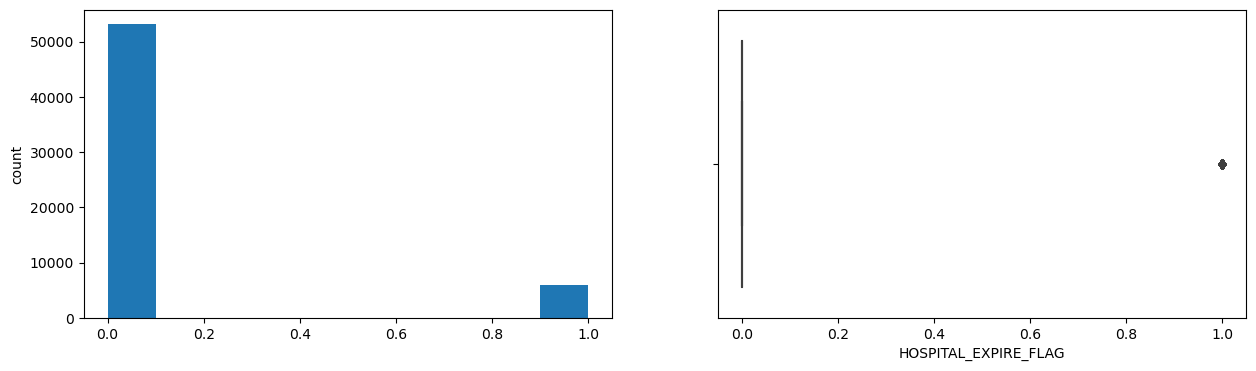

HAS_CHARTEVENTS_DATA


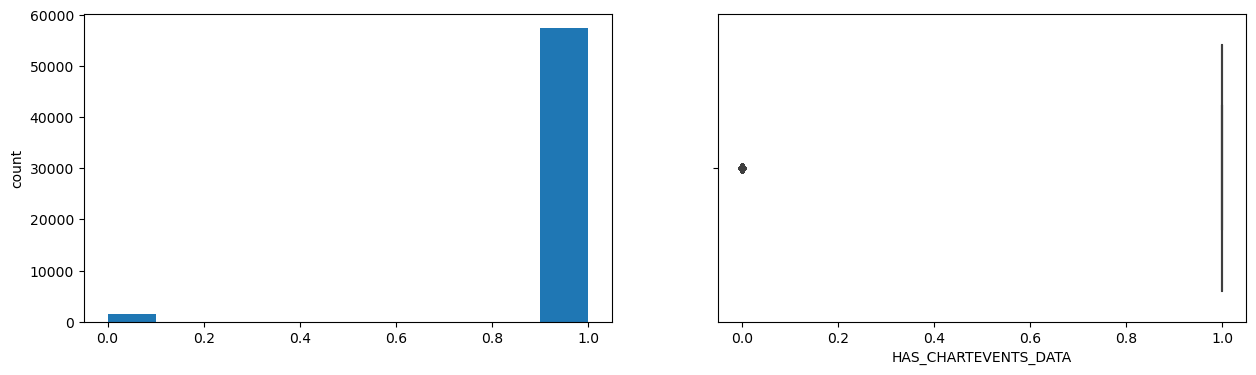

Readmitted


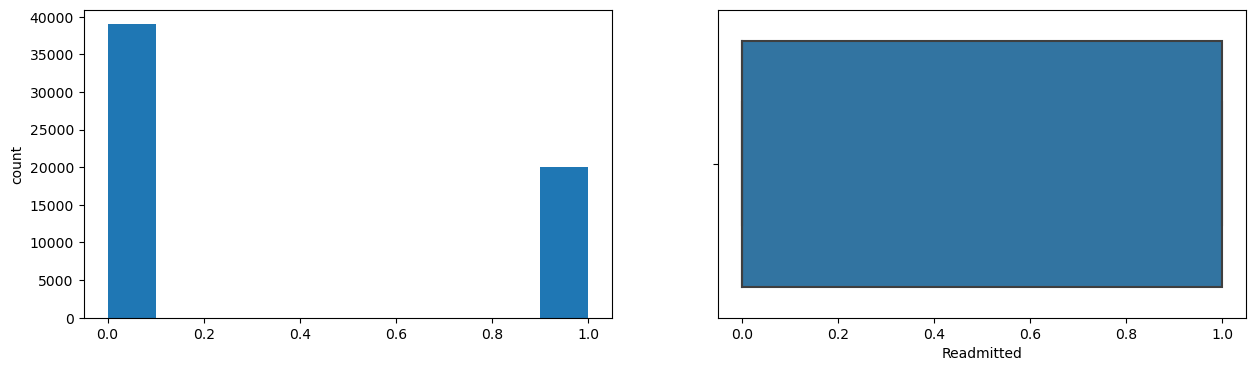

adm_disch_diff


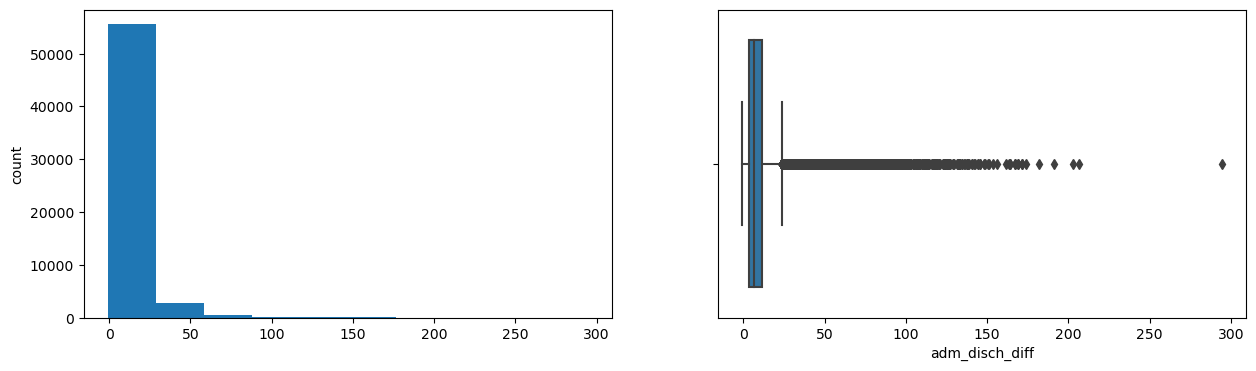

disch_death_diff


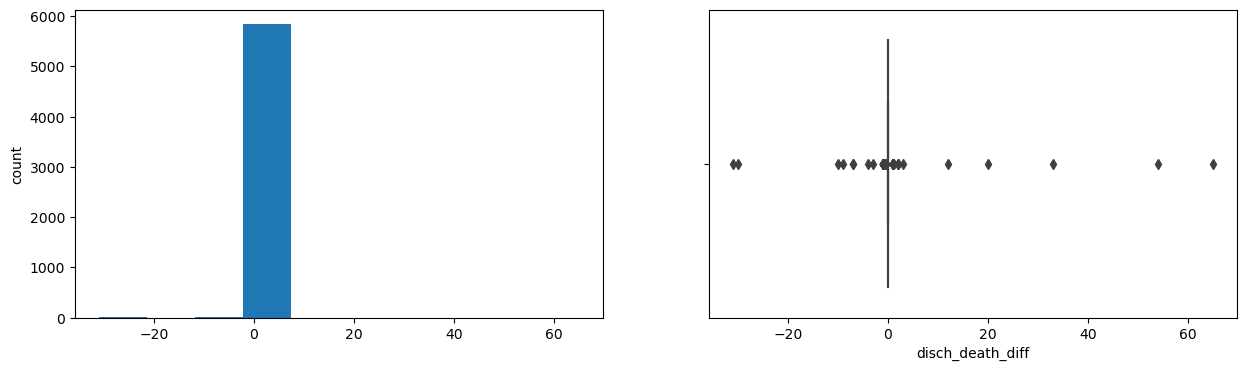

erreg_erout_diff


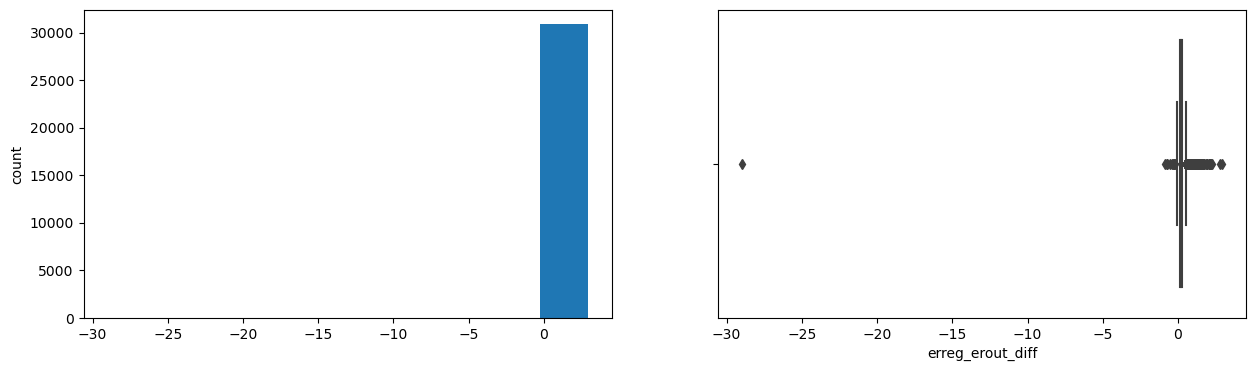

In [109]:
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    admissions[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=admissions[col])
    plt.show()

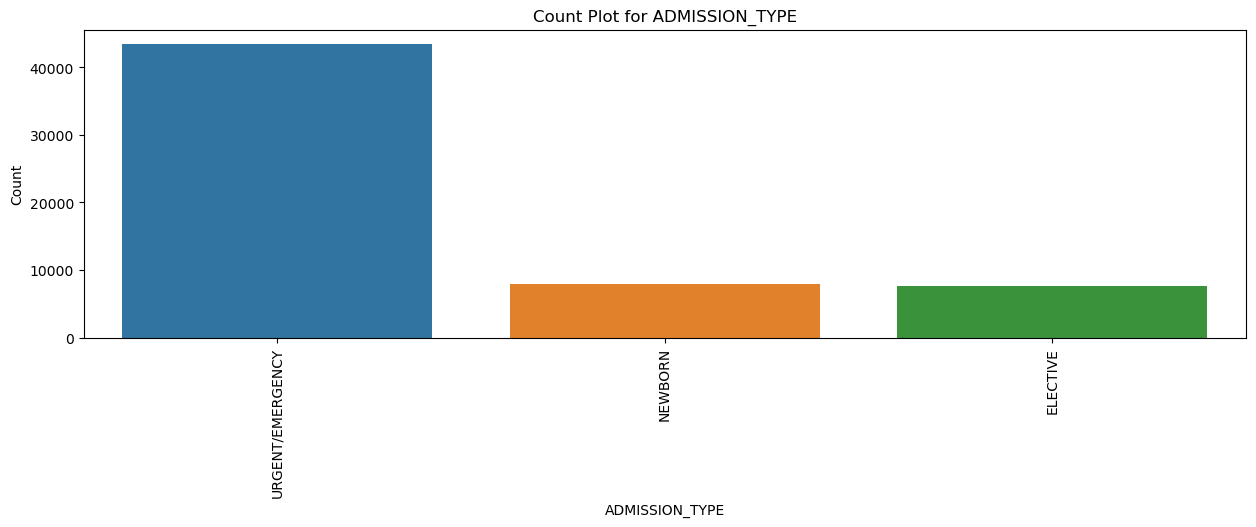

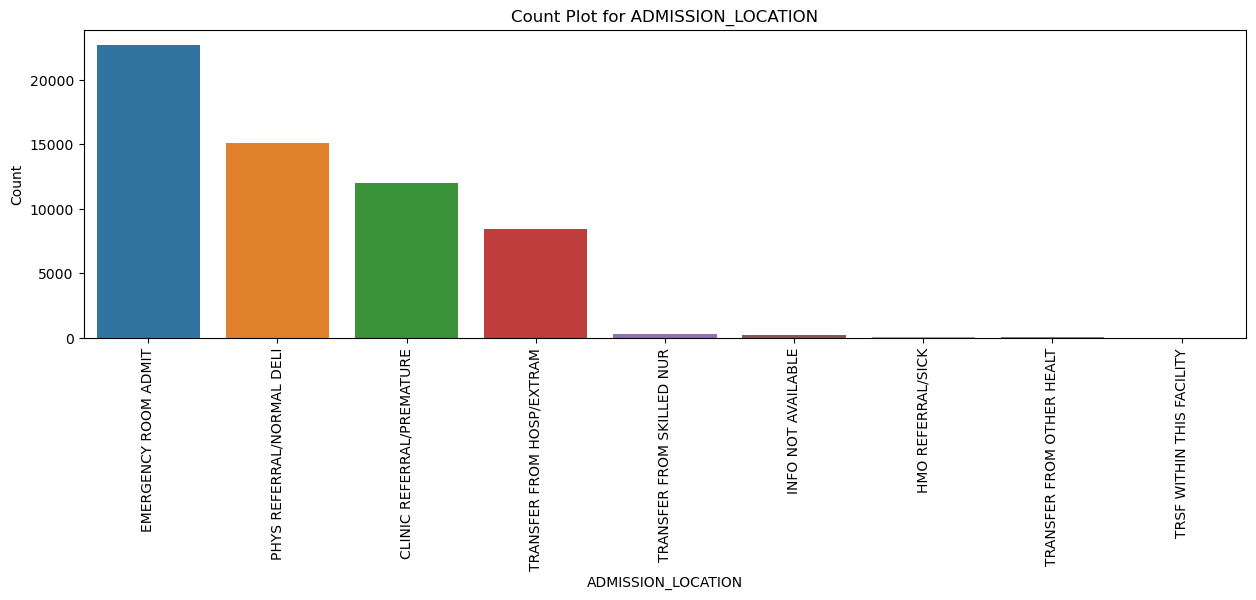

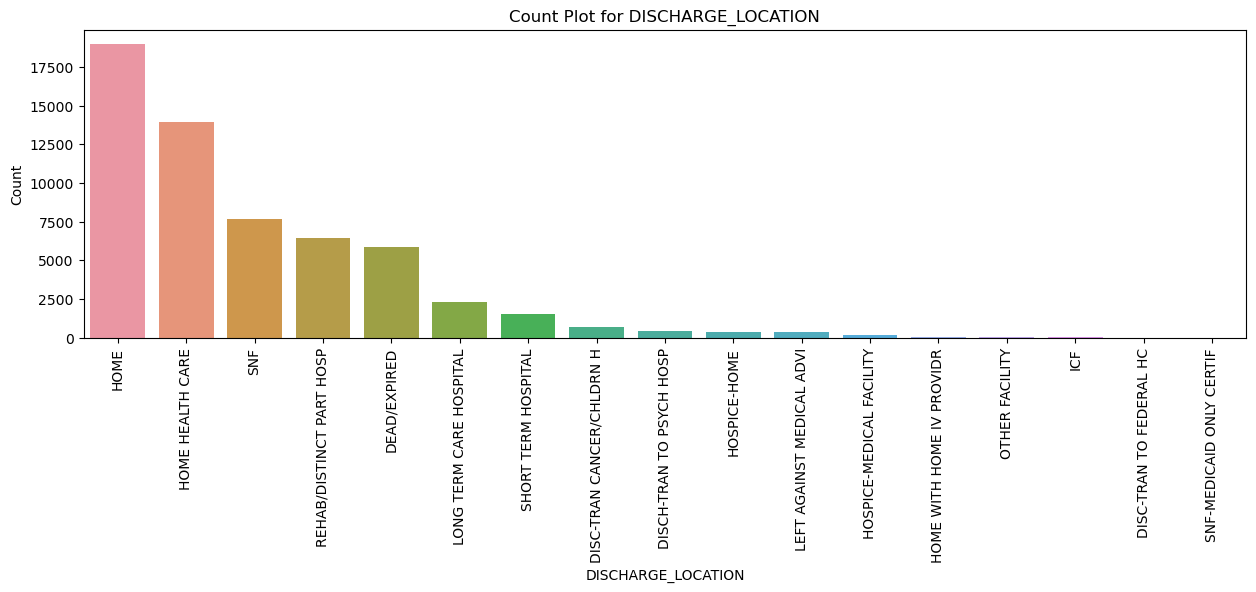

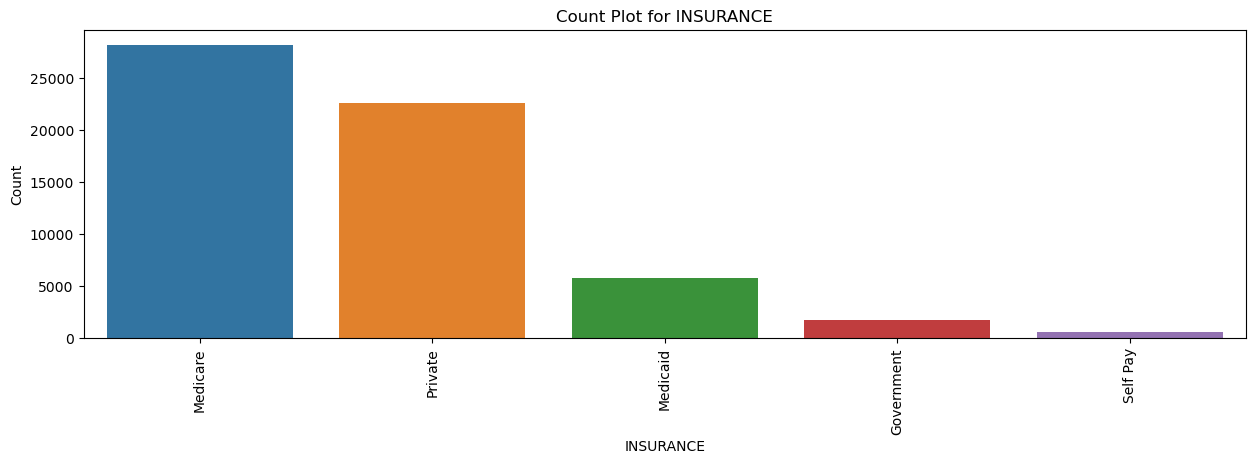

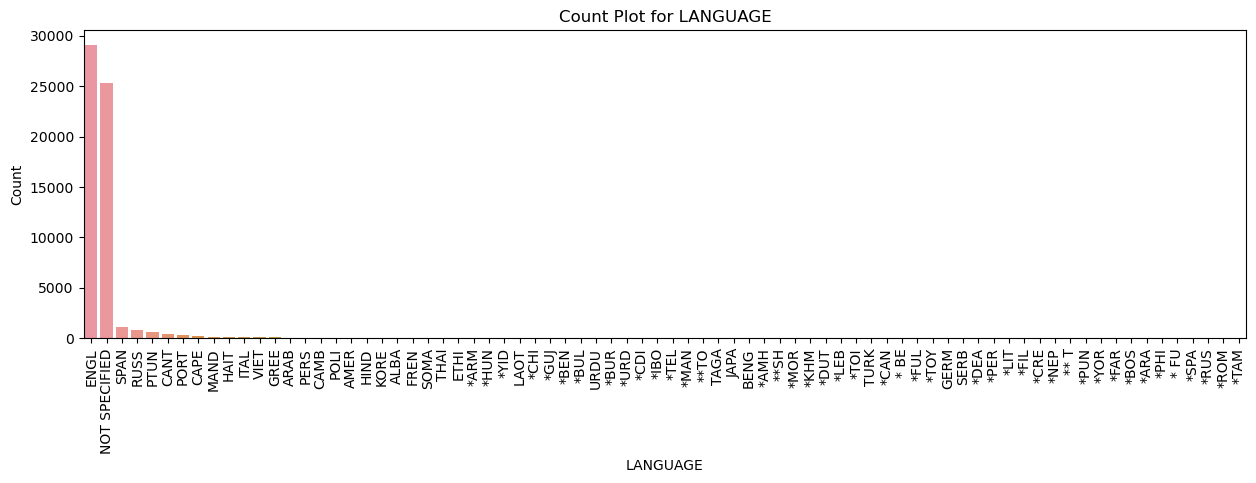

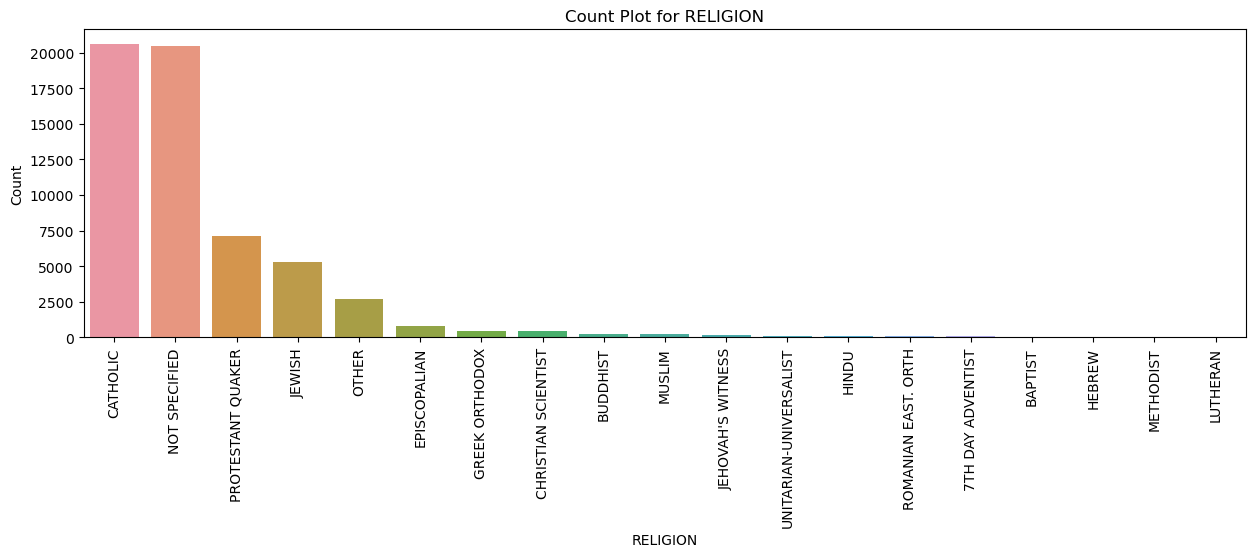

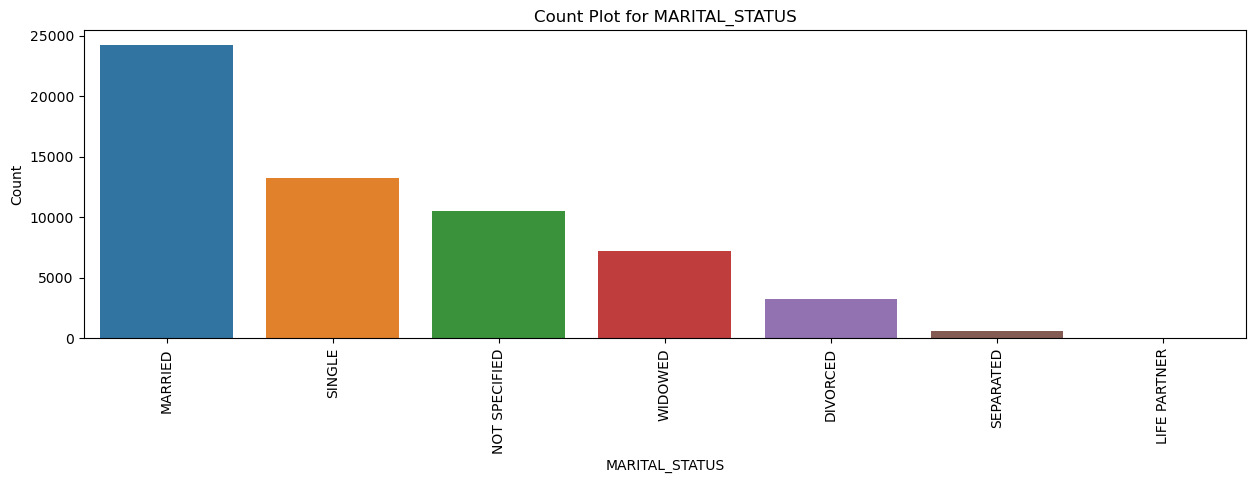

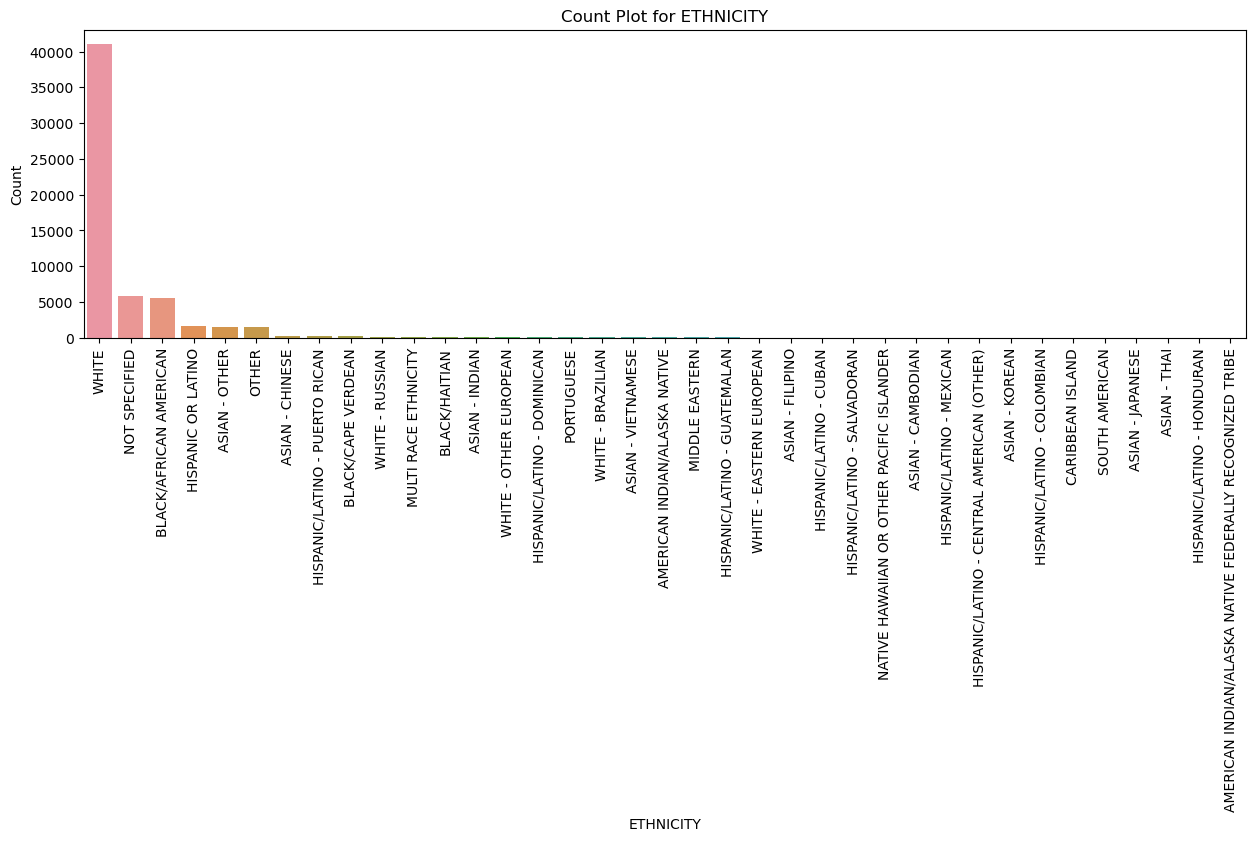

In [116]:
for col in cat_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(x=col, data=admissions, order=admissions[col].value_counts().index)
    plt.ylabel('Count')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

Correlation Matrix

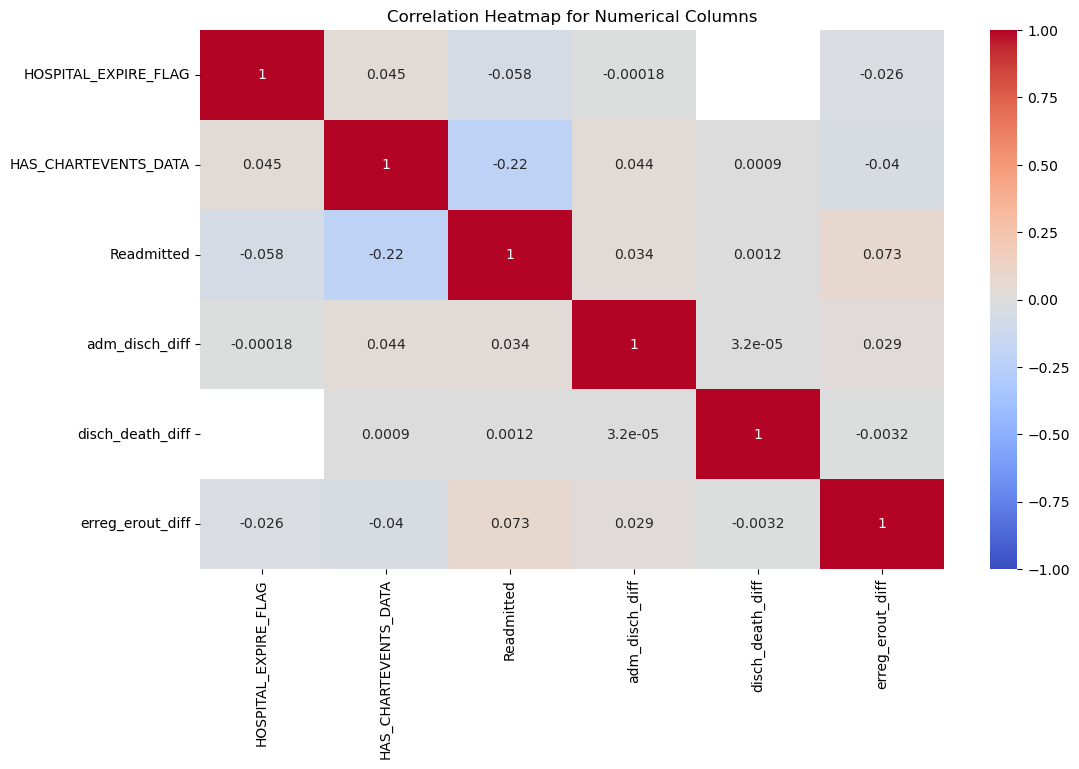

In [118]:
num_cols = admissions.select_dtypes(include= [np.number])

plt.figure(figsize=(12, 7))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

Export clean data

In [120]:
# to export clean data file
csv_path = 'admissions_clean.csv'
admissions.to_csv(csv_path,
                  index = False)